In [ ]:
class MyLinearRegression:
    def __init__(self, weight=9, bias=1.0004, learning_rate=0.001,
                 iterations=20):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
      'Scores':[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14
7,8,16
8,9,18
9,10,20


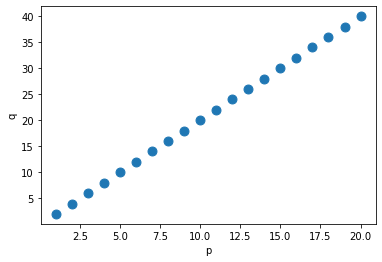

In [ ]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
y=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.scatter(x,y,s=80)
plt.xlabel('p')
plt.ylabel('q')
plt.show()

In [ ]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : -1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20]]),
 array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [7.33322314]	 Bias: [0.86486074]	 Cost: 1718.1470871694144
Iteration: 1	 Weight: [6.06136558]	 Bias: [0.76138953]	 Cost: 1000.4345497269992
Iteration: 2	 Weight: [5.09085764]	 Bias: [0.68238839]	 Cost: 582.5319200515928
Iteration: 3	 Weight: [4.35029943]	 Bias: [0.62205956]	 Cost: 339.1996649683322
Iteration: 4	 Weight: [3.78520812]	 Bias: [0.57597896]	 Cost: 197.514536603144
Iteration: 5	 Weight: [3.35400969]	 Bias: [0.54077073]	 Cost: 115.0155009223159
Iteration: 6	 Weight: [3.0249804]	 Bias: [0.51385884]	 Cost: 66.97876319956796
Iteration: 7	 Weight: [2.77391293]	 Bias: [0.49327766]	 Cost: 39.008394565574335
Iteration: 8	 Weight: [2.58233552]	 Bias: [0.47752722]	 Cost: 22.722074656282437
Iteration: 9	 Weight: [2.43615294]	 Bias: [0.465463]	 Cost: 13.239028127256828
Iteration: 10	 Weight: [2.32460965]	 Bias: [0.45621162]	 Cost: 7.717324948594399
Iteration: 11	 Weight: [2.23949842]	 Bias: [0.44910664]	 Cost: 4.502193956921205
Iteration: 12	 Weight: [2.1745566]	 B

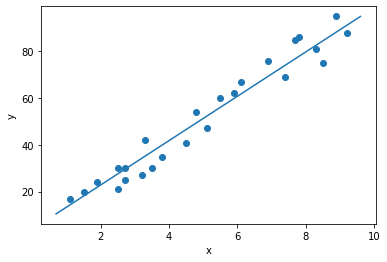

In [ ]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()